In [1]:
import pandas as pd

In [6]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc-taxi-experiment")

2025/12/05 15:31:44 INFO mlflow.tracking.fluent: Experiment with name 'nyc-taxi-experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/mlruns/2', creation_time=1764945104161, experiment_id='2', last_update_time=1764945104161, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [7]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [9]:
lpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)
lpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)

In [10]:
df['duration']=lpep_dropoff_datetime-lpep_pickup_datetime

In [11]:
df['duration'].head()

0   0 days 00:08:26
1   0 days 00:06:19
2   0 days 00:12:45
3   0 days 00:09:37
4   0 days 00:10:50
Name: duration, dtype: timedelta64[us]

In [12]:
df.duration=df.duration.apply(lambda td: td.total_seconds()/60)

In [13]:
df.duration.head()

0     8.433333
1     6.316667
2    12.750000
3     9.616667
4    10.833333
Name: duration, dtype: float64

In [14]:
df=df[df.duration>0]

In [15]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    3.065645e+06
mean     1.567475e+01
std      4.260107e+01
min      1.666667e-02
50%      1.153333e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.726667e+01
max      1.002918e+04
Name: duration, dtype: float64

In [16]:
# Keep only durations included between 1 and 60 minutes

In [17]:
df = df[ (df.duration >1) & (df.duration<60) ]

In [18]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [19]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    3.008849e+06
mean     1.420544e+01
std      9.937594e+00
min      1.016667e+00
50%      1.155000e+01
95%      3.476667e+01
98%      4.450000e+01
99%      5.026667e+01
max      5.998333e+01
Name: duration, dtype: float64

In [20]:
categorical=['PULocationID', 'DOLocationID']
numerical=['trip_distance']

In [21]:
# Convet categories into strings (they are integers in the sorce data frame) in order to use a Dictionary Vectorizer (see next cells)

In [22]:
df[categorical] = df[categorical].astype(str)

In [23]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [24]:
from sklearn.feature_extraction import DictVectorizer

In [25]:
df[categorical + numerical].iloc[:10]

,PULocationID,DOLocationID,trip_distance
0,161,141,0.97
1,43,237,1.10
2,48,238,2.51
3,138,7,1.90
4,107,79,1.43
5,161,137,1.84
6,239,143,1.66
7,142,200,11.70
8,164,236,2.95
9,141,107,3.01


In [26]:
# Create a training dictionary by converting rows related to categorical + numerical columns into dictionaries

In [27]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [28]:
train_dicts[:10]

[{'PULocationID': '161', 'DOLocationID': '141', 'trip_distance': 0.97},
 {'PULocationID': '43', 'DOLocationID': '237', 'trip_distance': 1.1},
 {'PULocationID': '48', 'DOLocationID': '238', 'trip_distance': 2.51},
 {'PULocationID': '138', 'DOLocationID': '7', 'trip_distance': 1.9},
 {'PULocationID': '107', 'DOLocationID': '79', 'trip_distance': 1.43},
 {'PULocationID': '161', 'DOLocationID': '137', 'trip_distance': 1.84},
 {'PULocationID': '239', 'DOLocationID': '143', 'trip_distance': 1.66},
 {'PULocationID': '142', 'DOLocationID': '200', 'trip_distance': 11.7},
 {'PULocationID': '164', 'DOLocationID': '236', 'trip_distance': 2.95},
 {'PULocationID': '141', 'DOLocationID': '107', 'trip_distance': 3.01}]

In [29]:
# Use the DictVectorizer() to create one feature for each PULocationID and DOLocationID values

In [30]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [31]:
X_train[:10,:10]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (10, 10)>

In [32]:
dv.feature_names_[-10:]

['PULocationID=90',
 'PULocationID=91',
 'PULocationID=92',
 'PULocationID=93',
 'PULocationID=94',
 'PULocationID=95',
 'PULocationID=96',
 'PULocationID=97',
 'PULocationID=98',
 'trip_distance']

In [33]:
target = 'duration'
y_train = df[target].values

In [34]:
y_train.size

3008849

In [35]:
y_train[:10]

array([ 8.43333333,  6.31666667, 12.75      ,  9.61666667, 10.83333333,
       12.3       , 10.45      , 22.73333333, 14.93333333, 10.9       ])

In [36]:
# Train a linear regression model

In [37]:
X_train.toarray()

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.97],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.1 ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.51],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 4.67],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 3.15],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.85]], shape=(3008849, 516))

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
# visualize predictions on the same training data

In [41]:
y_pred = lr.predict(X_train)

In [42]:
y_pred

array([11.47342664, 10.93389163, 11.37595493, ..., 11.67295836,
       12.70943978, 11.61136069], shape=(3008849,))

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_84117/1505421196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_84117/1505421196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


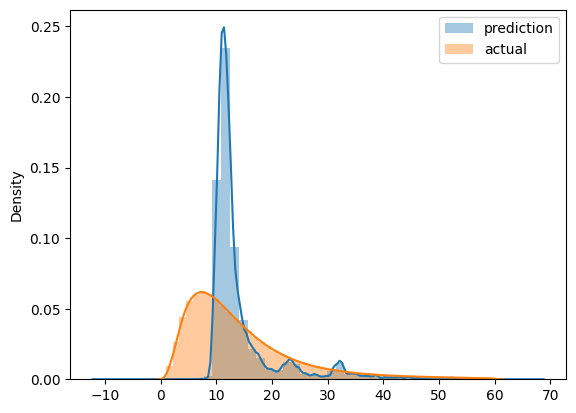

In [44]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

In [45]:
# Estimate the model score
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred)

58.62420268269791

In [46]:
# error is very high, try to use another model
from sklearn.linear_model import Lasso

In [55]:
with mlflow.start_run():

    alpha=0.01
    
    mlflow.set_tag("developer","Beppe")
    mlflow.log_param("train-data-url","https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
    mlflow.log_param("alpha",alpha)

    lr_lasso = Lasso(alpha)
    lr_lasso.fit(X_train, y_train)
    y_pred_lasso = lr.predict(X_train)

    rmse = mean_squared_error(y_train, y_pred_lasso)

    mlflow.log_param("rmse",rmse)
    

In [54]:
import pickle
with open('models/lin_reg.bin','wb') as f_out:
    pickle.dump((dv,lr), f_out)

In [48]:
df_train = df[categorical + numerical]

In [49]:
df_train[:10]

,PULocationID,DOLocationID,trip_distance
0,161,141,0.97
1,43,237,1.10
2,48,238,2.51
3,138,7,1.90
4,107,79,1.43
5,161,137,1.84
6,239,143,1.66
7,142,200,11.70
8,164,236,2.95
9,141,107,3.01


In [50]:
df_train[ ( (df_train.PULocationID=='161') & ( df_train.DOLocationID=='141') ) ]

,PULocationID,DOLocationID,trip_distance
0,161,141,0.97
604,161,141,2.00
1434,161,141,1.83
2240,161,141,1.41
2260,161,141,1.80
...,...,...,...
3064303,161,141,1.36
3065972,161,141,1.96
3066315,161,141,1.10
3066490,161,141,1.82


In [51]:
df[ (df.trip_distance==0) ]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
278,2,2023-01-01 00:39:02,2023-01-01 00:46:03,1.0,0.0,1.0,N,137,162,1,7.90,1.0,0.5,3.22,0.0,1.0,16.12,2.5,0.0,7.016667
279,2,2023-01-01 00:47:29,2023-01-01 00:55:49,1.0,0.0,1.0,N,233,141,1,8.60,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.0,8.333333
280,2,2023-01-01 00:59:24,2023-01-01 01:14:26,1.0,0.0,1.0,N,141,193,2,13.50,1.0,0.5,0.00,0.0,1.0,18.50,2.5,0.0,15.033333
442,2,2023-01-01 00:37:17,2023-01-01 00:38:51,1.0,0.0,5.0,N,255,264,1,40.00,0.0,0.0,8.20,0.0,1.0,49.20,0.0,0.0,1.566667
1060,2,2023-01-01 00:37:33,2023-01-01 00:46:49,1.0,0.0,1.0,N,264,229,1,9.30,1.0,0.5,2.36,0.0,1.0,14.16,0.0,0.0,9.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066753,1,2023-01-31 23:12:06,2023-01-31 23:32:16,NaN,0.0,NaN,None,164,13,0,12.64,0.0,0.5,0.00,0.0,1.0,16.64,NaN,NaN,20.166667
3066755,1,2023-01-31 23:28:56,2023-01-31 23:45:11,NaN,0.0,NaN,None,144,48,0,13.08,0.0,0.5,0.00,0.0,1.0,17.08,NaN,NaN,16.250000
3066756,1,2023-01-31 23:05:36,2023-01-31 23:20:37,NaN,0.0,NaN,None,161,148,0,12.74,0.0,0.5,0.00,0.0,1.0,16.74,NaN,NaN,15.016667
3066758,1,2023-01-31 23:10:56,2023-01-31 23:23:37,NaN,0.0,NaN,None,162,151,0,12.00,1.0,0.5,9.40,0.0,1.0,28.40,NaN,NaN,12.683333


In [ ]:
# TODO: create a feature that combines both PU (Pick up) and DO (Drop off) features and retarin the model with that